In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tqdm import tqdm

import allensdk.brain_observatory.behavior.behavior_project_cache as bpc
import mindscope_utilities
import mindscope_utilities.ophys

from multiprocessing import Pool

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
data_dir =  "/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/neuromatch_data"

experiment_table = pd.read_parquet(os.path.join(data_dir, 'inhibitory_familiar_novel_experiment_table_subset.parquet'))
neural_data = pd.read_parquet(os.path.join(data_dir, 'inhibitory_familiar_novel_neural_data_subset.parquet'))
stimulus_data = pd.read_parquet(os.path.join(data_dir, 'inhibitory_familiar_novel_stimulus_data_subset.parquet'))

In [4]:
experiment_table

,ophys_experiment_id,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,file_id,image_set
0,957759562,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085398531,novel
1,957759576,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085398256,novel
2,957759572,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085398490,novel
3,957759566,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085397178,novel
4,957759574,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028351,VisualBehaviorMultiscope,75,VISl,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085396688,novel
5,957759570,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028354,VisualBehaviorMultiscope,150,VISl,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085397104,novel
6,957759564,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085398496,novel
7,882968566,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,3,882674040,882748184,1018028374,VisualBehaviorMultiscope,276,VISp,2019-06-07 10:20:12.900288,OPHYS_4_images_B,1085673587,novel
8,882968574,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,3,882674040,882748184,1018028387,VisualBehaviorMultiscope,298,VISl,2019-06-07 10:20:12.900288,OPHYS_4_images_B,1085673591,novel
9,882968568,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,3,882674040,882748184,1018028364,VisualBehaviorMultiscope,75,VISp,2019-06-07 10:20:12.900288,OPHYS_4_images_B,1085673615,novel


In [5]:
neural_data

,timestamps,cell_roi_id,cell_specimen_id,dff,events,filtered_events,ophys_experiment_id,ophys_session_id
0,8.20550,1080828951,1086621236,2.834924,0.000000,0.000000,882968566,882674040
1,8.29874,1080828951,1086621236,4.390167,2.691331,0.895133,882968566,882674040
2,8.39198,1080828951,1086621236,5.442224,0.000000,0.789952,882968566,882674040
3,8.48522,1080828951,1086621236,6.393567,2.505632,1.376295,882968566,882674040
4,8.57846,1080828951,1086621236,11.128161,5.637157,2.900963,882968566,882674040
...,...,...,...,...,...,...,...,...
48279,4509.79442,1080737835,1086622997,1.191217,0.000000,0.161781,957759564,957020350
48280,4509.88766,1080737835,1086622997,0.943278,0.000000,0.065444,957759564,957020350
48281,4509.98089,1080737835,1086622997,1.072913,0.000000,0.020742,957759564,957020350
48282,4510.07412,1080737835,1086622997,0.747701,0.000000,0.005145,957759564,957020350


In [6]:
stimulus_data.head()

,stimulus_presentations_id,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time,is_change,ophys_session_id
0,0,0.25023,18001.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,0,False,17986,308.21048,308.46071,False,882674040
1,1,0.25020,18046.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,1,False,18031,308.96110,309.21130,False,882674040
2,2,0.25020,18091.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,2,False,18076,309.71171,309.96191,False,882674040
3,3,0.25022,18136.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,3,False,18121,310.46231,310.71253,False,882674040
4,4,0.25019,18181.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4,False,18166,311.21292,311.46311,True,882674040


In [7]:
print('image set types: {}'.format(experiment_table['image_set'].unique()))

image set types: ['novel']


In [8]:
print('stimulus presentations can be changes: {}'.format(stimulus_data['is_change'].unique()))

stimulus presentations can be changes: [False  True]


In [9]:
print('cre lines (cell types) included in this dataset are: {}'.format(experiment_table['cre_line'].unique()))

cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']


In [10]:
print('there are {} mice in this dataset'.format(len(experiment_table['mouse_id'].unique()),))

there are 2 mice in this dataset


In [11]:
print('there are {} neurons in this dataset'.format(len(neural_data['cell_roi_id'].unique()),))

there are 165 neurons in this dataset


## We can calculate the response of a cell to a given set of events using the `event_triggered_response` function in `mindscope_utilities`.

In [12]:
%%time
cell_roi_id = 1080722726
session_id = neural_data.query('cell_roi_id == @cell_roi_id')['ophys_session_id'].unique()[0]
omission_triggered_response = mindscope_utilities.event_triggered_response(
    data = neural_data.query('cell_roi_id == @cell_roi_id'),
    t = 'timestamps',
    y = 'dff',
    event_times = stimulus_data.query('ophys_session_id == @session_id and omitted == True')['start_time'],
    t_before = 2,
    t_after = 2,
    output_sampling_rate = 50
)

CPU times: user 695 ms, sys: 140 ms, total: 835 ms
Wall time: 619 ms


<AxesSubplot:xlabel='time', ylabel='dff'>

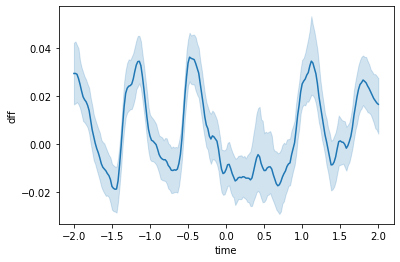

In [13]:
sns.lineplot(
    data = omission_triggered_response,
    x = 'time',
    y = 'dff'
)

In [14]:
omission_triggered_responses = []
cell_roi_ids = neural_data['cell_roi_id'].unique()

for cell_roi_id in tqdm(cell_roi_ids):
    session_id = neural_data.query('cell_roi_id == @cell_roi_id')['ophys_session_id'].unique()[0]
    
    this_cell_response = mindscope_utilities.event_triggered_response(
        data = neural_data.query('cell_roi_id == @cell_roi_id'),
        t = 'timestamps',
        y = 'dff',
        event_times = stimulus_data.query('ophys_session_id == @session_id and omitted')['start_time'],
        t_before = 2,
        t_after = 2,
        output_sampling_rate = 50
    )
    this_cell_response['cell_roi_id'] = cell_roi_id
    omission_triggered_responses.append(this_cell_response)
    
omission_triggered_responses = pd.concat(omission_triggered_responses)

100%|██████████| 165/165 [01:17<00:00,  2.14it/s]


In [15]:
otr_by_cell = omission_triggered_responses.groupby(['time','cell_roi_id']).mean().reset_index()
otr_by_cell

,time,cell_roi_id,dff
0,-2.0,1080722543,0.018637
1,-2.0,1080722557,0.075637
2,-2.0,1080722565,0.032793
3,-2.0,1080722584,0.013963
4,-2.0,1080722600,0.019780
...,...,...,...
33160,2.0,1080832628,0.013589
33161,2.0,1080832636,0.077443
33162,2.0,1080832717,0.048762
33163,2.0,1080832733,0.035167


### Now merge in the experiment table so we have access to metadata

In [16]:
otr_by_cell = otr_by_cell.merge(
    neural_data[['cell_roi_id','ophys_experiment_id']].drop_duplicates(),
    left_on = 'cell_roi_id',
    right_on = 'cell_roi_id',
    how='left'
).merge(
    experiment_table,
    left_on = 'ophys_experiment_id',
    right_on = 'ophys_experiment_id'
)

In [17]:
otr_by_cell

,time,cell_roi_id,dff,ophys_experiment_id,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,file_id,image_set
0,-2.0,1080722543,0.018637,957759574,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028351,VisualBehaviorMultiscope,75,VISl,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085396688,novel
1,-2.0,1080722557,0.075637,957759574,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028351,VisualBehaviorMultiscope,75,VISl,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085396688,novel
2,-2.0,1080722565,0.032793,957759574,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028351,VisualBehaviorMultiscope,75,VISl,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085396688,novel
3,-2.0,1080722584,0.013963,957759574,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028351,VisualBehaviorMultiscope,75,VISl,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085396688,novel
4,-2.0,1080722600,0.019780,957759574,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028351,VisualBehaviorMultiscope,75,VISl,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085396688,novel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33160,2.0,1080832628,0.013589,882968574,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,3,882674040,882748184,1018028387,VisualBehaviorMultiscope,298,VISl,2019-06-07 10:20:12.900288,OPHYS_4_images_B,1085673591,novel
33161,2.0,1080832636,0.077443,882968574,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,3,882674040,882748184,1018028387,VisualBehaviorMultiscope,298,VISl,2019-06-07 10:20:12.900288,OPHYS_4_images_B,1085673591,novel
33162,2.0,1080832717,0.048762,882968574,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,3,882674040,882748184,1018028387,VisualBehaviorMultiscope,298,VISl,2019-06-07 10:20:12.900288,OPHYS_4_images_B,1085673591,novel
33163,2.0,1080832733,0.035167,882968574,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,3,882674040,882748184,1018028387,VisualBehaviorMultiscope,298,VISl,2019-06-07 10:20:12.900288,OPHYS_4_images_B,1085673591,novel


<AxesSubplot:xlabel='time', ylabel='dff'>

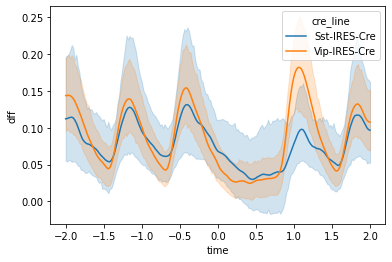

In [18]:
sns.lineplot(
    data = otr_by_cell,
    x = 'time',
    y = 'dff',
    n_boot = 1000,
    hue = 'cre_line',
)

In [19]:
def get_otr(cell_roi_id):
    session_id = neural_data.query('cell_roi_id == @cell_roi_id')['ophys_session_id'].unique()[0]
    
    this_cell_response = mindscope_utilities.event_triggered_response(
        data = neural_data.query('cell_roi_id == @cell_roi_id'),
        t = 'timestamps',
        y = 'dff',
        event_times = stimulus_data.query('ophys_session_id == @session_id and omitted')['start_time'],
        t_before = 2,
        t_after = 2,
        output_sampling_rate = 50
    )
    this_cell_response['cell_roi_id'] = cell_roi_id
    
    return this_cell_response

In [20]:
%%time
cell_roi_ids = neural_data['cell_roi_id'].unique()

with Pool(32) as pool:
    otr_by_cell_from_pool = pool.map(get_otr, cell_roi_ids)

otr_by_cell_from_pool = pd.concat(otr_by_cell_from_pool).groupby(['time','cell_roi_id']).mean().reset_index()

CPU times: user 2.33 s, sys: 2.09 s, total: 4.42 s
Wall time: 8.9 s


In [22]:
otr_by_cell_from_pool = otr_by_cell_from_pool.merge(
    neural_data[['cell_roi_id','ophys_experiment_id']].drop_duplicates(),
    left_on = 'cell_roi_id',
    right_on = 'cell_roi_id',
    how='left'
).merge(
    experiment_table,
    left_on = 'ophys_experiment_id',
    right_on = 'ophys_experiment_id'
)

<AxesSubplot:xlabel='time', ylabel='dff'>

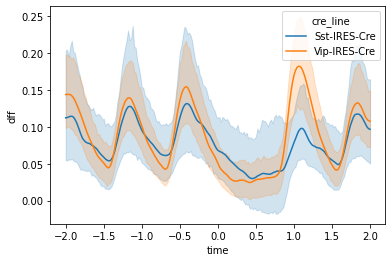

In [23]:
sns.lineplot(
    data = otr_by_cell_from_pool,
    x = 'time',
    y = 'dff',
    n_boot = 1000,
    hue = 'cre_line',
)

In [181]:
omission_triggered_responses

,time,dff,event_number,event_time,ophys_experiment_id,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,file_id,image_set
0,-2.00,0.277368,0,316.24258,957759562,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085398531,novel
1,-1.98,0.277368,0,316.24258,957759562,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085398531,novel
2,-1.96,0.277368,0,316.24258,957759562,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085398531,novel
3,-1.94,0.277368,0,316.24258,957759562,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085398531,novel
4,-1.92,0.238829,0,316.24258,957759562,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0,0.0,4,957020350,957032492,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-27 08:28:05.415005,OPHYS_4_images_B,1085398531,novel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415060,1.92,-0.097335,188,3872.1363,882968564,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,3,882674040,882748184,1018028367,VisualBehaviorMultiscope,150,VISp,2019-06-07 10:20:12.900288,OPHYS_4_images_B,1085673617,novel
415061,1.94,-0.101897,188,3872.1363,882968564,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,3,882674040,882748184,1018028367,VisualBehaviorMultiscope,150,VISp,2019-06-07 10:20:12.900288,OPHYS_4_images_B,1085673617,novel
415062,1.96,-0.101897,188,3872.1363,882968564,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,3,882674040,882748184,1018028367,VisualBehaviorMultiscope,150,VISp,2019-06-07 10:20:12.900288,OPHYS_4_images_B,1085673617,novel
415063,1.98,-0.101897,188,3872.1363,882968564,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,435431,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,203.0,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,3,882674040,882748184,1018028367,VisualBehaviorMultiscope,150,VISp,2019-06-07 10:20:12.900288,OPHYS_4_images_B,1085673617,novel


<AxesSubplot:xlabel='time', ylabel='dff'>

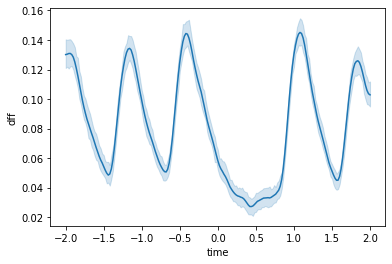

In [128]:
sns.lineplot(
    data = omission_triggered_responses,
    x = 'time',
    y = 'dff',
    n_boot = 100
)

<AxesSubplot:xlabel='time', ylabel='dff'>

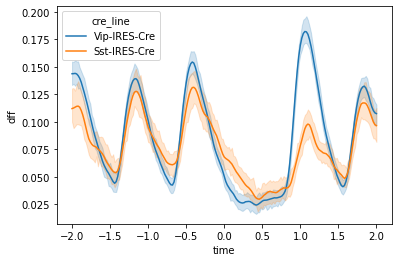

In [129]:
sns.lineplot(
    data = omission_triggered_responses,
    x = 'time',
    y = 'dff',
    n_boot = 100,
    hue = 'cre_line'
)

<AxesSubplot:xlabel='time', ylabel='dff'>

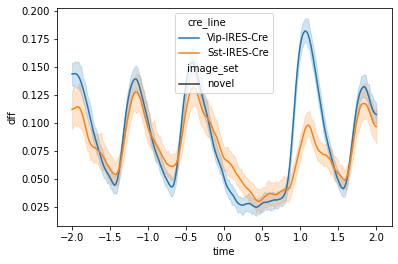

In [130]:
sns.lineplot(
    data = omission_triggered_responses,
    x = 'time',
    y = 'dff',
    n_boot = 100,
    hue = 'cre_line',
    style = 'image_set'
)

In [132]:
neural_data['cell_roi_id'].unique()

array([1080828951, 1080828952, 1080828955, 1080828958, 1080828963,
       1080828967, 1080828985, 1080828992, 1080828998, 1080829002,
       1080829005, 1080832277, 1080832426, 1080832495, 1080832551,
       1080832598, 1080832628, 1080832636, 1080832717, 1080832733,
       1080832760, 1080820672, 1080820686, 1080820696, 1080820710,
       1080820721, 1080820734, 1080820805, 1080820815, 1080820879,
       1080820889, 1080820932, 1080820968, 1080820994, 1080821000,
       1080821008, 1080821036, 1080821043, 1080821056, 1080821060,
       1080829159, 1080829169, 1080829180, 1080829223, 1080829231,
       1080829242, 1080829247, 1080829254, 1080829267, 1080829272,
       1080829278, 1080829291, 1080829334, 1080829344, 1080829369,
       1080829376, 1080829389, 1080829394, 1080829397, 1080829407,
       1080829413, 1080829107, 1080829116, 1080829126, 1080829137,
       1080829170, 1080829183, 1080829185, 1080829200, 1080829229,
       1080829233, 1080829246, 1080829255, 1080829260, 1080829

In [133]:
stimulus_data.query('ophys_session_id == @session_id and omitted')

,stimulus_presentations_id,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time,is_change,ophys_session_id
10,10,0.25,NaN,8,omitted,omitted,0,True,18435,316.24258,316.49258,False,957020350
65,65,0.25,NaN,8,omitted,omitted,1,True,20910,357.52631,357.77631,False,957020350
69,69,0.25,NaN,8,omitted,omitted,2,True,21090,360.52883,360.77883,False,957020350
123,123,0.25,NaN,8,omitted,omitted,3,True,23521,401.07856,401.32856,False,957020350
140,140,0.25,NaN,8,omitted,omitted,4,True,24286,413.83900,414.08900,False,957020350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,4648,0.25,NaN,8,omitted,omitted,155,True,227178,3798.13742,3798.38742,False,957020350
4661,4661,0.25,NaN,8,omitted,omitted,156,True,227764,3807.91203,3808.16203,False,957020350
4688,4688,0.25,NaN,8,omitted,omitted,157,True,228980,3828.19530,3828.44530,False,957020350
4715,4715,0.25,NaN,8,omitted,omitted,158,True,230195,3848.46188,3848.71188,False,957020350


<AxesSubplot:xlabel='time', ylabel='dff'>

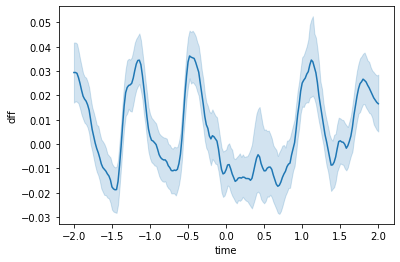

In [138]:
cell_roi_id = 1080722726
ophys_session_id = neural_data.query('cell_roi_id == @cell_roi_id')['ophys_session_id'].unique()[0]

omission_triggered_response = mindscope_utilities.event_triggered_response(
    data = neural_data.query('cell_roi_id == @cell_roi_id'),
    t = 'timestamps',
    y = 'dff',
    event_times = stimulus_data.query('ophys_session_id == @ophys_session_id and omitted == True')['start_time'],
    t_before = 2,
    t_after = 2,
    output_sampling_rate = 50
)

sns.lineplot(
    data = omission_triggered_response,
    x = 'time',
    y = 'dff'
)

In [88]:
neural_data.query('cell_roi_id ==1080829185')['ophys_experiment_id'].unique()

array([882968564])

In [139]:
ophys_experiment_id = 882968564
ophys_session_id = neural_data.query('cell_roi_id == @cell_roi_id')['ophys_session_id'].unique()[0]

omission_triggered_responses = []
cell_roi_ids = neural_data.query('ophys_experiment_id == @ophys_experiment_id')['cell_roi_id'].unique()

for cell_roi_id in tqdm(cell_roi_ids):
    ophys_session_id = neural_data.query('cell_roi_id == @cell_roi_id')['ophys_session_id'].unique()[0]
    this_cell_response = mindscope_utilities.event_triggered_response(
        data = neural_data.query('cell_roi_id == @cell_roi_id'),
        t = 'timestamps',
        y = 'dff',
        event_times = stimulus_data.query('ophys_session_id == @ophys_session_id and omitted')['start_time'],
        t_before = 2,
        t_after = 2,
        output_sampling_rate = 50
    )
    this_cell_response['cell_roi_id'] = cell_roi_id
    omission_triggered_responses.append(this_cell_response)
    
omission_triggered_responses = pd.concat(omission_triggered_responses)

100%|██████████| 26/26 [00:12<00:00,  2.02it/s]


<AxesSubplot:xlabel='time', ylabel='dff'>

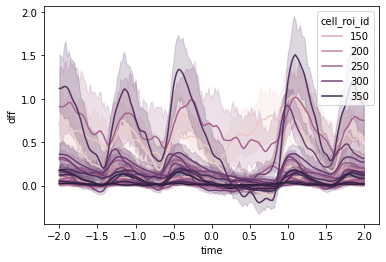

In [141]:
fig, ax = plt.subplots()
sns.lineplot(
    data = omission_triggered_responses,
    x = 'time',
    y = 'dff',
    n_boot = 100,
    hue = 'cell_roi_id',
    ax = ax
)

# cell_roi_id = 1080829185
# omission_triggered_response = mindscope_utilities.event_triggered_response(
#     data = neural_data.query('cell_roi_id == @cell_roi_id'),
#     t = 'timestamps',
#     y = 'dff',
#     event_times = stimulus_data.query('ophys_session_id == @session_id and omitted == True')['start_time'],
#     t_before = 2,
#     t_after = 2,
#     output_sampling_rate = 50
# )

# sns.lineplot(
#     data = omission_triggered_response,
#     x = 'time',
#     y = 'dff',
#     ax = ax
# )

In [99]:
ophys_experiment_id = 882968564
ophys_session_id = neural_data.query('cell_roi_id == @cell_roi_id')['ophys_session_id'].unique()[0]

omission_triggered_responses = []
cell_roi_ids = neural_data.query('ophys_experiment_id == @ophys_experiment_id')['cell_roi_id'].unique()

for cell_roi_id in tqdm(cell_roi_ids):
    ophys_session_id = neural_data.query('cell_roi_id == @cell_roi_id')['ophys_session_id'].unique()[0]
    this_cell_response = mindscope_utilities.event_triggered_response(
        data = neural_data.query('cell_roi_id == @cell_roi_id').groupby('timestamps'),
        t = 'timestamps',
        y = 'dff',
        event_times = stimulus_data.query('ophys_session_id == @ophys_session_id and omitted')['start_time'],
        t_before = 2,
        t_after = 2,
        output_sampling_rate = 50
    )
    this_cell_response['cell_roi_id'] = cell_roi_id
    omission_triggered_responses.append(this_cell_response)
    
omission_triggered_responses = pd.concat(omission_triggered_responses)

10       316.24258
65       357.52631
69       360.52883
123      401.07856
140      413.83900
           ...    
4648    3798.13742
4661    3807.91203
4688    3828.19530
4715    3848.46188
4725    3855.96799
Name: start_time, Length: 160, dtype: float64

In [150]:
ophys_experiment_id = 882968564
ophys_session_id = neural_data.query('ophys_experiment_id == @ophys_experiment_id')['ophys_session_id'].unique()[0]
neural_data.query('ophys_experiment_id == @ophys_experiment_id').groupby('timestamps').mean().reset_index()

experiment_etr = mindscope_utilities.event_triggered_response(
    data = neural_data.query('ophys_experiment_id == @ophys_experiment_id').groupby('timestamps').mean().reset_index(),
    t = 'timestamps',
    y = 'dff',
    event_times = stimulus_data.query('ophys_session_id == @ophys_session_id and omitted')['start_time'],
    t_before = 2,
    t_after = 2,
    output_sampling_rate = 50
)

In [151]:
experiment_etr

,time,dff,event_number,event_time
0,-2.00,1.531865,0,325.4579
1,-1.98,1.531865,0,325.4579
2,-1.96,1.632278,0,325.4579
3,-1.94,1.798114,0,325.4579
4,-1.92,1.963949,0,325.4579
...,...,...,...,...
37984,1.92,-0.097335,188,3872.1363
37985,1.94,-0.101897,188,3872.1363
37986,1.96,-0.101897,188,3872.1363
37987,1.98,-0.101897,188,3872.1363


<AxesSubplot:xlabel='time', ylabel='dff'>

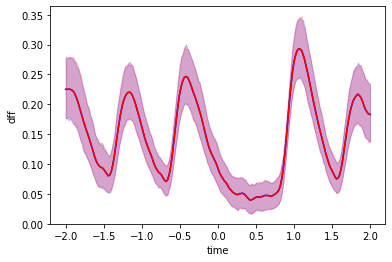

In [174]:
fig, ax = plt.subplots()
sns.lineplot(
    data = experiment_etr,
    x = 'time',
    y = 'dff',
    n_boot = 1000,
    ax = ax,
    color='blue'
)

sns.lineplot(
    data = omission_triggered_responses.groupby(['time', 'event_number',]).mean().reset_index(),
    x = 'time',
    y = 'dff',
    n_boot = 1000,
    ax = ax,
    color='red'
)

In [172]:
omission_triggered_responses.groupby(['time', 'event_number',]).mean().reset_index()

,time,event_number,dff,cell_roi_id
0,-2.0,0,1.531865,1.080829e+09
1,-2.0,1,1.799969,1.080829e+09
2,-2.0,10,0.003042,1.080829e+09
3,-2.0,100,0.287001,1.080829e+09
4,-2.0,101,0.390741,1.080829e+09
...,...,...,...,...
37984,2.0,95,0.034739,1.080829e+09
37985,2.0,96,0.453448,1.080829e+09
37986,2.0,97,0.057870,1.080829e+09
37987,2.0,98,0.078365,1.080829e+09


In [185]:
omission_triggered_responses['event_number'].value_counts()

3      2412
148    2412
20     2412
40     2412
54     2412
       ... 
167    1005
187    1005
185    1005
173    1005
175    1005
Name: event_number, Length: 189, dtype: int64

In [192]:
len(omission_triggered_responses.query('time == -2'))

2065

In [ ]:
omi